In [ ]:
#pip install catboost

     |████████████████████████████████| 66.1MB 63kB/s 


**Loading libraries**

In this part, some of the primary libraries would be loaded for future use, the rest of the libraries would be loaded as per requirement.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pydot
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Loading DataFiles**

There are three files in total that are to be loaded as a dataset, and the file train.csv has to be renamed Sales.csv

In [ ]:
sales = pd.read_csv("Sales.csv")
stores = pd.read_csv("stores.csv")
features = pd.read_csv("features.csv")

**Merging multiple dataframes into one**

Here are the dataframes created are merged into one and that part is of essence

In [ ]:
df = pd.merge(sales,stores,on = "Store")
df = pd.merge(df,features,on=['Store','Date'])
df.to_csv('merge.csv', index=False)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df["year"] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df_new = df.drop(['Date', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'],axis = 1)
df_new = df_new.fillna(0)
print(df_new.head())
print('Total shape of the final DataFrame is :',df_new.shape)

   Store  Dept  Weekly_Sales  IsHoliday_x  ... IsHoliday_y  year  month  day
0      1     1      24924.50        False  ...       False  2010      2    5
1      1     2      50605.27        False  ...       False  2010      2    5
2      1     3      13740.12        False  ...       False  2010      2    5
3      1     4      39954.04        False  ...       False  2010      2    5
4      1     5      32229.38        False  ...       False  2010      2    5

[5 rows x 14 columns]
Total shape of the final DataFrame is : (421570, 14)


**Data Overview**

Briefing about number of rows, columns, features, missing values and unique values.

In [ ]:
## Exploring the Data
print ("Rows     : " , df_new.shape[0])
print ("Columns  : " , df_new.shape[1])
print ("\nFeatures : \n" , df_new.columns.tolist())
print ("\nMissing values :  ", df_new.isnull().sum())
print ("\nUnique values :  \n", df_new.nunique())

Rows     :  421570
Columns  :  14

Features : 
 ['Store', 'Dept', 'Weekly_Sales', 'IsHoliday_x', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday_y', 'year', 'month', 'day']

Missing values :   Store           0
Dept            0
Weekly_Sales    0
IsHoliday_x     0
Type            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday_y     0
year            0
month           0
day             0
dtype: int64

Unique values :  
 Store               45
Dept                81
Weekly_Sales    359464
IsHoliday_x          2
Type                 3
Size                40
Temperature       3528
Fuel_Price         892
CPI               2145
Unemployment       349
IsHoliday_y          2
year                 3
month               12
day                 31
dtype: int64


**Data Exploration**


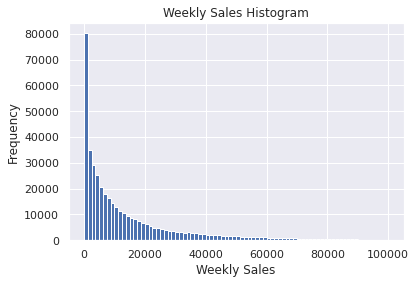

In [ ]:
plt.hist(df_new["Weekly_Sales"], bins=80,range=[0,100000])  ## Binning the column Weekly_sales into 80 bins
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.title("Weekly Sales Histogram")
plt.show()

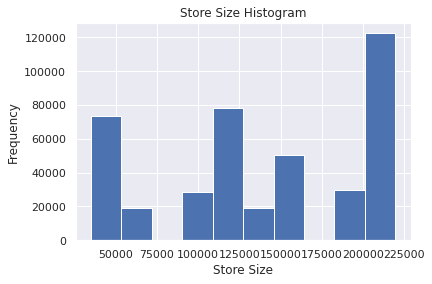

In [ ]:
plt.hist(df_new["Size"])
plt.xlabel("Store Size")
plt.ylabel("Frequency")
plt.title("Store Size Histogram")
plt.show()

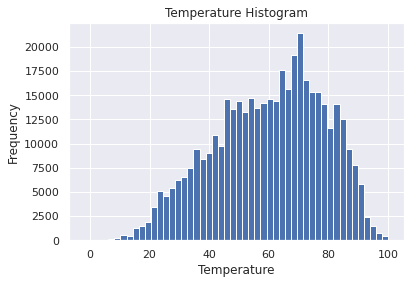

In [ ]:
plt.hist(df_new["Temperature"],bins = 50) ## Binning the temperaturte column into 50 bins
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Histogram")
plt.show()

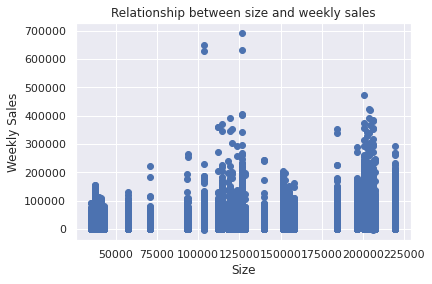

In [ ]:
plt.scatter(df_new["Size"],df_new['Weekly_Sales'])
plt.xlabel("Size")
plt.ylabel("Weekly Sales")
plt.title("Relationship between size and weekly sales")
plt.show()

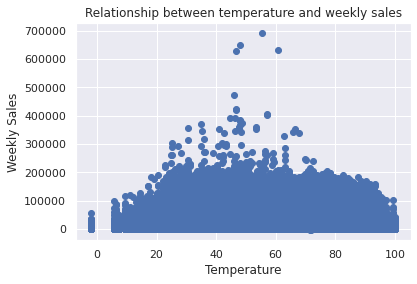

In [ ]:
plt.scatter(df_new["Temperature"],df_new['Weekly_Sales'])
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.title("Relationship between temperature and weekly sales")
plt.show()

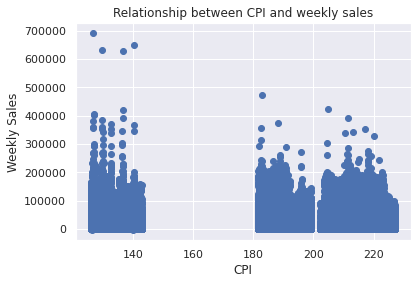

In [ ]:
plt.scatter(df_new["CPI"],df_new['Weekly_Sales'])
plt.xlabel("CPI")
plt.ylabel("Weekly Sales")
plt.title("Relationship between CPI and weekly sales")
plt.show()

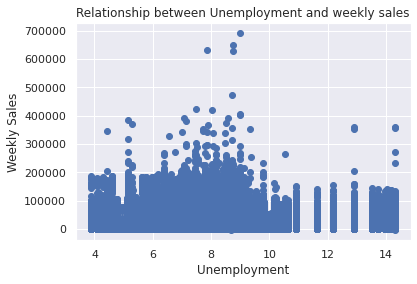

In [ ]:
plt.scatter(df_new["Unemployment"],df_new['Weekly_Sales'])
plt.xlabel("Unemployment")
plt.ylabel("Weekly Sales")
plt.title("Relationship between Unemployment and weekly sales")
plt.show()

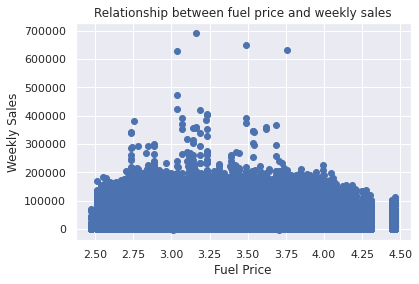

In [ ]:
plt.scatter(df_new["Fuel_Price"],df_new['Weekly_Sales'])
plt.xlabel("Fuel Price")
plt.ylabel("Weekly Sales")
plt.title("Relationship between fuel price and weekly sales")
plt.show()

**creating variables and train test split**

In [ ]:
x = df_new.drop("Weekly_Sales",axis = 1)
y = df_new[["Weekly_Sales"]]

In [ ]:
x_dum = pd.get_dummies(data=x, columns=['IsHoliday_x', 'Type','IsHoliday_y'])
x_train, x_test, y_train, y_test = train_test_split(x_dum,y,test_size = 0.2, shuffle = True)
x_train.dtypes

Store                  int64
Dept                   int64
Size                   int64
Temperature          float64
Fuel_Price           float64
CPI                  float64
Unemployment         float64
year                   int64
month                  int64
day                    int64
IsHoliday_x_False      uint8
IsHoliday_x_True       uint8
Type_A                 uint8
Type_B                 uint8
Type_C                 uint8
IsHoliday_y_False      uint8
IsHoliday_y_True       uint8
dtype: object


**Base Line Models Used for Prediction**
1. OLS Regression
2. Decision Tree
3. SVM Regression


1. OLS Regression

In [ ]:
ols_model = LinearRegression()
ols_model.fit(x_train,y_train.values.ravel())
y_predict_ols = ols_model.predict(x_test)
error_ols = metrics.mean_squared_error(y_test, y_predict_ols)
error_ols

460461533.4900643

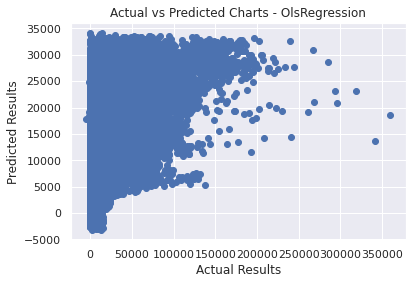

In [ ]:
plt.scatter(y_test,y_predict_ols)
plt.title("Actual vs Predicted Charts - OlsRegression")
plt.xlabel("Actual Results")
plt.ylabel("Predicted Results")
plt.show()

2. Decision Tree

In [ ]:
error_dt = []
for d in range(1,21):
    dt_model = DecisionTreeRegressor(max_depth=d)
    dt_model.fit(x_train,y_train)
    y_predict = dt_model.predict(x_test)
    error = metrics.mean_squared_error(y_test, y_predict)
    error_dt.append(error)
    print(str(d) + "=" + str(error)) 

1=445330258.23989564
2=385140769.7823886
3=312129333.68709815
4=285584672.3134339
5=227239792.06781077
6=145760401.17283207
7=118962757.11691837
8=97767428.31087174
9=78681236.05473179
10=62304359.46597524
11=48135640.861428246
12=37430972.18189956
13=30680675.764989506
14=25673860.005012326
15=22989009.21727522
16=21136027.091749623
17=19776903.923675228
18=18752079.684490178
19=18974844.259854198
20=18423231.439855088


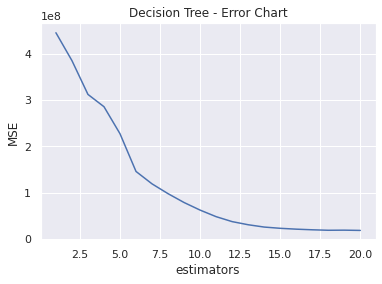

In [ ]:
plt.plot(range(1,21),error_dt)
plt.title("Decision Tree - Error Chart")
plt.xlabel("estimators")
plt.ylabel("MSE")
plt.show()

In [ ]:
optimal_dt = 6
dt_model = DecisionTreeRegressor(max_depth=optimal_dt)
dt_model.fit(x_train,y_train)
y_predict_dt = dt_model.predict(x_test)
error_dt = metrics.mean_squared_error(y_test, y_predict_dt)
error_dt

145760401.17283207

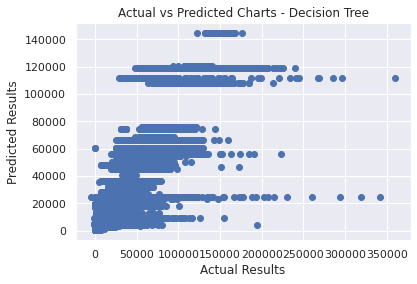

In [ ]:
plt.scatter(y_test,y_predict_dt)
plt.title("Actual vs Predicted Charts - Decision Tree")
plt.xlabel("Actual Results")
plt.ylabel("Predicted Results")
plt.show()

3. Support Vector Regression

In [ ]:
import warnings #this function is used to alert the user
warnings.filterwarnings("ignore")

svr_model = LinearSVR()
svr_model.fit(x_train,y_train.values.ravel())
y_predict_svr = svr_model.predict(x_test)
error_svr = metrics.mean_squared_error(y_test, y_predict_svr)
error_svr

659446969.4737164

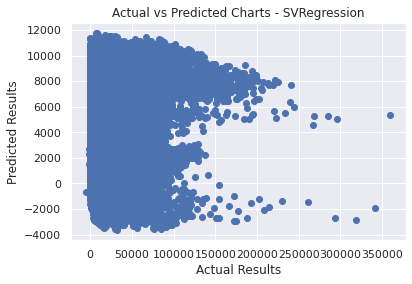

In [ ]:
plt.scatter(y_test,y_predict_svr)
plt.title("Actual vs Predicted Charts - SVRegression")
plt.xlabel("Actual Results")
plt.ylabel("Predicted Results")
plt.show()

**Ensemble Models Used for Prediction**
1. Random Forest
2. Adaboost Regressor
3. Gradient Boosting
4. XG Boost
5. LightGBM
6. CatBoost Regressor


1. Random Forest Regressor

In [ ]:
error_rfr = []
for d in range(1,11):
    randomforest = RandomForestRegressor(max_depth=d)
    randomforest.fit(x_train,y_train.values.ravel())
    y_predict_rfr = randomforest.predict(x_test)
    error = metrics.mean_squared_error(y_test,y_predict_rfr)
    error_rfr.append(error)
    print(str(d)+ "="+str(error))

1=445330060.42229754
2=385096372.6793233
3=308921814.28467625
4=271527583.3415336
5=193815301.21381542
6=140095313.88192382
7=114382628.89713983
8=91853314.91234596
9=72198747.86320856
10=56691685.139798224


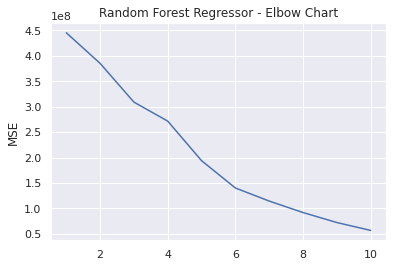

In [ ]:
plt.plot(range(1,11),error_rfr)
plt.title("Random Forest Regressor - Elbow Chart")
plt.ylabel("MSE")
plt.show()

In [ ]:
optimal_rfr = 6
randomforest = RandomForestRegressor(max_depth=optimal_rfr)
randomforest.fit(x_train,y_train.values.ravel())
y_predict_rfr = randomforest.predict(x_test)
error_rfr = metrics.mean_squared_error(y_test,y_predict_rfr)

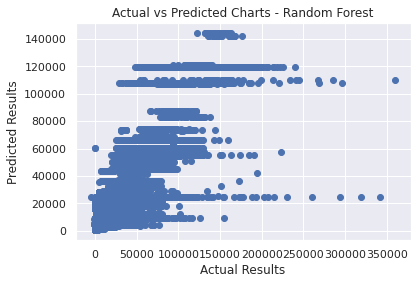

In [ ]:
plt.scatter(y_test,y_predict_rfr)
plt.title("Actual vs Predicted Charts - Random Forest")
plt.xlabel("Actual Results")
plt.ylabel("Predicted Results")
plt.show()

2. Adaboost Regressor

In [ ]:
ada_error = []
for e in range(1,21):
    adaboost = AdaBoostRegressor(n_estimators=e)
    adaboost.fit(x_train,y_train.values.ravel())
    y_predict = adaboost.predict(x_test)
    error = metrics.mean_squared_error(y_test,y_predict)
    ada_error.append(error)
    print(str(e) +" " + str(error))

1 312477188.00680435
2 312135785.0525076
3 317907699.796355
4 312916998.1688236
5 375500971.8782904
6 339632464.1008052
7 347119973.4699529
8 362078320.66737574
9 360839467.5260586
10 358812114.24079496
11 370182301.3324283
12 356597859.9501647
13 365441554.4719184
14 363474241.75703436
15 385123179.50359637
16 387453190.20812494
17 383192403.9119847
18 394259711.5029454
19 387045778.4144141
20 382765548.382119


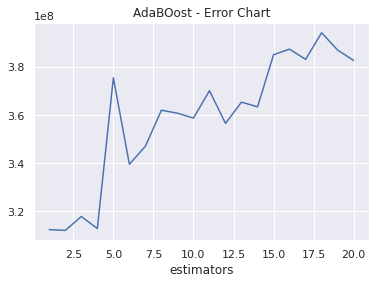

In [ ]:
plt.plot(range(1,21),ada_error)
plt.title("AdaBOost - Error Chart")
plt.xlabel("estimators")
plt.show("MSE")

In [ ]:
adaboost = AdaBoostRegressor(n_estimators=4)
adaboost.fit(x_train,y_train.values.ravel())
y_predict_ada = adaboost.predict(x_test)
error_ada = metrics.mean_squared_error(y_test,y_predict_ada)

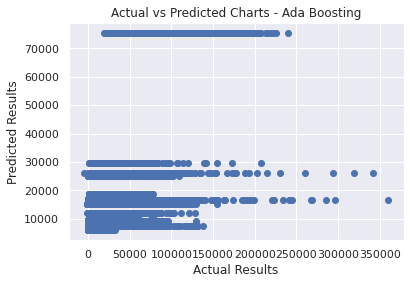

In [ ]:
plt.scatter(y_test,y_predict_ada)
plt.title("Actual vs Predicted Charts - Ada Boosting")
plt.xlabel("Actual Results")
plt.ylabel("Predicted Results")
plt.show()

3. Gradient Boosting Regressor

In [ ]:
gbm = GradientBoostingRegressor()
gbm.fit(x_train,y_train.values.ravel())
y_predict_gbm = gbm.predict(x_test)
error_gbm = metrics.mean_squared_error(y_test,y_predict_gbm)

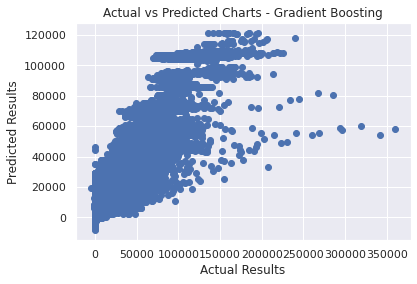

125024022.60527484


In [ ]:
plt.scatter(y_test,y_predict_gbm)
plt.title("Actual vs Predicted Charts - Gradient Boosting")
plt.xlabel("Actual Results")
plt.ylabel("Predicted Results")
plt.show()
print(error_gbm)

4. ExtremeGradient Boosting Regressor(XGBoost Regressor)

In [ ]:
error_xgb = []
for d in range(1,21):
    xgb_model = xgb.XGBRegressor(objective="reg:squarederror",colsample_bytree = 0.3, 
                                 learning_rate = 0.1,
                                 max_depth = d, alpha = 10, 
                                 n_estimators = 10)
    xgb_model.fit(x_train,y_train)
    y_predict_xgb = xgb_model.predict(x_test)
    error = metrics.mean_squared_error(y_test, y_predict_xgb)
    error_xgb.append(error)
    print(str(d) + "=" + str(error))    

1=493041635.0688186
2=460696171.51972437
3=446824478.65533835
4=419642663.7024725
5=388807100.2523616
6=370864746.84896
7=361221573.4387922
8=346523502.22628766
9=335918902.0467895
10=325359495.6892477
11=317976259.1067232
12=314429611.22247416
13=307164876.7732058
14=304240169.0739813
15=300698800.7940624
16=299039152.95019126
17=297775738.828385
18=297013267.7297393
19=296503875.7301637
20=296259499.1310791


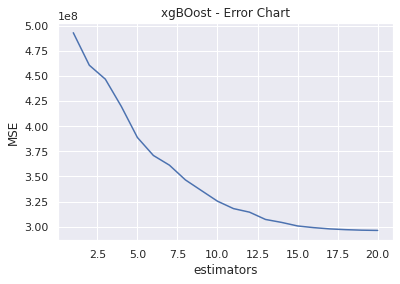

In [ ]:
plt.plot(range(1,21),error_xgb)
plt.title("xgBOost - Error Chart")
plt.xlabel("estimators")
plt.ylabel("MSE")
plt.show()

In [ ]:
optimal_depth = 10
xgb_model = xgb.XGBRegressor(objective="reg:squarederror",colsample_bytree = 0.3, 
                             learning_rate = 0.1,
                             max_depth = 10, alpha = 10, 
                             n_estimators = 10)
xgb_model.fit(x_train,y_train)
y_predict_xgb = xgb_model.predict(x_test)
error_xgb = metrics.mean_squared_error(y_test, y_predict_xgb)

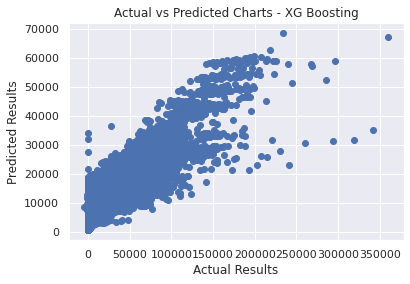

In [ ]:
plt.scatter(y_test,y_predict_xgb)
plt.title("Actual vs Predicted Charts - XG Boosting")
plt.xlabel("Actual Results")
plt.ylabel("Predicted Results")
plt.show()

5. LightGradientBoostingMechanism Regressor  (LGBM Regressor)

In [ ]:
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(x_train,y_train)
y_predict_lgb = lgb_model.predict(x_test)
error_lgb = metrics.mean_squared_error(y_test, y_predict_lgb)
print(error_lgb)

42809857.40091642


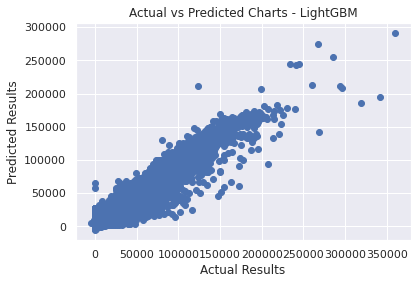

In [ ]:
plt.scatter(y_test,y_predict_lgb)
plt.title("Actual vs Predicted Charts - LightGBM")
plt.xlabel("Actual Results")
plt.ylabel("Predicted Results")
plt.show()

6. CatBoost Regressor

In [ ]:
cbr_model = CatBoostRegressor(n_estimators=100,learning_rate=0.1)
cbr_model.fit(x_train, y_train)
y_predict_cbr = cbr_model.predict(x_test)
error_cbr = metrics.mean_squared_error(y_test,y_predict_cbr)
print(error_cbr)

0:	learn: 21893.0067511	total: 114ms	remaining: 11.3s
1:	learn: 21134.1518233	total: 166ms	remaining: 8.14s
2:	learn: 20484.4730579	total: 217ms	remaining: 7.01s
3:	learn: 19940.1273228	total: 268ms	remaining: 6.43s
4:	learn: 19418.8207651	total: 323ms	remaining: 6.14s
5:	learn: 19009.5035308	total: 374ms	remaining: 5.87s
6:	learn: 18672.5475649	total: 424ms	remaining: 5.64s
7:	learn: 18320.2482048	total: 479ms	remaining: 5.5s
8:	learn: 18015.2765323	total: 530ms	remaining: 5.36s
9:	learn: 17728.9165812	total: 582ms	remaining: 5.24s
10:	learn: 17159.2653053	total: 636ms	remaining: 5.15s
11:	learn: 16685.8695798	total: 690ms	remaining: 5.06s
12:	learn: 16472.6032221	total: 744ms	remaining: 4.98s
13:	learn: 16300.5822015	total: 807ms	remaining: 4.96s
14:	learn: 15903.9190267	total: 864ms	remaining: 4.89s
15:	learn: 15702.8240268	total: 914ms	remaining: 4.79s
16:	learn: 15399.9311569	total: 979ms	remaining: 4.78s
17:	learn: 15225.0897966	total: 1.03s	remaining: 4.7s
18:	learn: 15069.92876

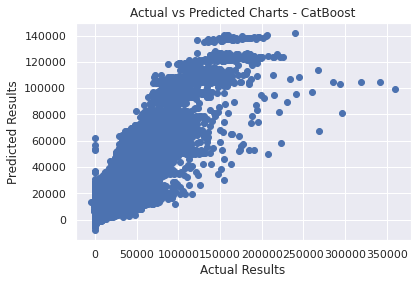

In [ ]:
plt.scatter(y_test,y_predict_cbr)
plt.title("Actual vs Predicted Charts - CatBoost")
plt.xlabel("Actual Results")
plt.ylabel("Predicted Results")
plt.show()

Final Results Consolidation and comparision Baseline Vs Ensemble Model Performances

In [ ]:
errors = {
    "Baseline_OLS": error_ols,
    "Baseline_Support Vector": error_svr,
    "Baseline_DescisionTree":error_dt,
    "Ensemble_RandomForest": error_rfr,
    "Ensemble_AdaBosost": error_ada,
    "Ensemble_GBM": error_gbm,
    "Ensemble_XGBoost": error_xgb,
    "Ensemble_LGBoost": error_lgb,
    "Ensemble_CatBoost": error_cbr,
    
}
errors

{'Baseline_DescisionTree': 145760401.17283207,
 'Baseline_OLS': 460461533.4900643,
 'Baseline_Support Vector': 659446969.4737164,
 'Ensemble_AdaBosost': 315126745.59979784,
 'Ensemble_CatBoost': 97854456.38278483,
 'Ensemble_GBM': 125024022.60527484,
 'Ensemble_LGBoost': 42809857.40091642,
 'Ensemble_RandomForest': 140032831.38253006,
 'Ensemble_XGBoost': 325359495.6892477}

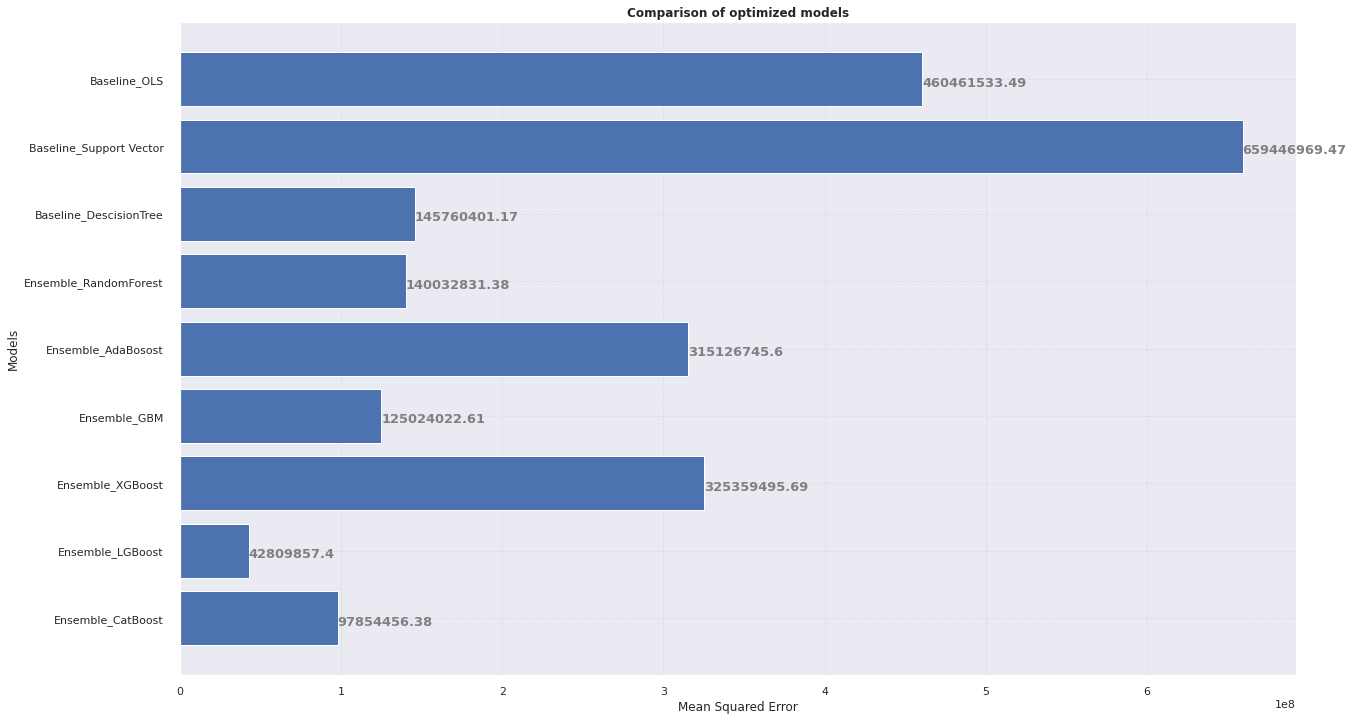

In [ ]:
x_pos = [i for i, _ in enumerate(errors)]
# Figure Size 
fig, ax = plt.subplots(figsize =(20, 12)) 
  
# Horizontal Bar Plot 
ax.barh( x_pos,errors.values()) 

# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
  
# Show top values  
ax.invert_yaxis() 
  
# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 13, fontweight ='bold', 
             color ='grey') 
  
# Add Plot Title 

plt.ylabel("Models")
plt.xlabel("Mean Squared Error")
plt.title("Comparison of optimized models", fontweight ='bold')
plt.yticks(x_pos, errors.keys())

  
# Show Plot 
plt.show()

In [ ]:
import plotly.offline as py
import plotly.figure_factory as ff

modelperformances = pd.DataFrame(errors.items(), columns=['Model_Name', 'Mean_Square_Error(MSE)'])
#modelperformanceshow t = modelperformances_bl.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(modelperformances,4))
table.layout.width=500
py.iplot(table)